# <ins>Chapter 4</ins>: _Classification Exercises_

This notebook will contain the Exercises and Practice Problems from **Chapter 4** of _Intro to Statistical Learning with Python_.

1. [Conceptual](#concept)
2. [Applied](#apply)


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots

# Model Libraries
import statsmodels.api as sm
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
 

# Import Data
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly, 
                         contrast)

## I. Conceptual <a name="concept"></a>

**Problem 5:**  
Q: We now examine the differences between LDA and QDA

**a.)** If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

<ins>Answer</ins>: TRAINING: QDA, higher variance model has increased flexibility to fit noise in the data.  
TEST: LDA, increased bias is without cost if Bayes decision boundary is linear.

**b.)** If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

<ins>Answer</ins>: TRAINING: QDA, higher variance model has increased flexibility to fit non-linear relationship in data and noise.  
TEST: QDA, higher variance model has increased flexibility to fit non-linear relationship in data

**c.)** In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

<ins>Answer</ins>: Improve. Increased sample size reduces a more flexible models tendency to overfit the training data.

**d.)** True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

<ins>Answer</ins>: False. If the bayes decision boundary is linear, then a more flexible model is prone to overfit and take account of noise in the training data that will reduce its accuracy in making predictions during test.

---
**Problem 6:** 
Q: Suppose we collect data for a group of students in a statistics class with variables `X1 = hours studied`, `X2 = undergrad GPA`, and `Y = receive an A`. We fit a logistic regression and produce estimated coefficient, `βˆ0 = −6`, `βˆ1 = 0.05`, `βˆ2 = 1`.

**a.)** Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class.

<ins>Answer</ins>: Using the following equation for multiple logistic regression a prediction p(X)...
$$p(X) = \frac{exp(\beta_0 + \beta_1X_1 + \beta_2X_2)}{1+exp(\beta_0 + \beta_1X_1 + \beta_2X_2)}$$
Plug in all those variabales and get $p(X) = 0.3775$

**b.)** How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

<ins>Answer</ins>: Solve for $X_1$ given $p(X)=0.5$ and $X_2=3.5$. Do that and youll get ~$50$ hours. 

## II. Applied <a name="apply"></a>

**Problem 13:**  
Q: This question should be answered using the `Weekly` data set, which is part of the `ISLP` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains $1,089$ weekly returns for $21$ years, from the beginning of $1990$ to the end of $2010$.

**a.)** Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

<ins>Answer</ins>: From the heatmap we see two correlated pairs...
1. Year – Volume
2. Today – Direction_UP

From the pairplot:
1. Volume increases exponentially with Year
2. There is a logistic relationship between Today and Direction_Up


**b.)** Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

<ins>Answer</ins>: The most significant predictos are `Lag1` and `Lag2` with p-vals of $0.118$ and $0.030$ respectively.

**c.)** Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. 

<ins>Answer</ins>: We have an accuracy of ~$56$% and errror rate of ~$44$%

**d.)** Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

**e.)** Repeat $(d)$ using LDA.

**f.)** Repeat $(d)$ using QDA

**g.)** Repeat $(d)$ using KNN with K = 1.

**i.)** Which of these methods appears to provide the best results on this data?

<ins>Answer</ins>: Seems basic logRegression (limited to the predictors with the highest corr) and LDA performed the best with the highest accuracy and lowest overall error rate. 

Peak into the data...
   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
5  1990  1.178  0.712  3.514 -2.576 -0.270  0.154444 -1.372      Down
6  1990 -1.372  1.178  0.712  3.514 -2.576  0.151722  0.807        Up
7  1990  0.807 -1.372  1.178  0.712  3.514  0.132310  0.041        Up
8  1990  0.041  0.807 -1.372  1.178  0.712  0.143972  1.253        Up
9  1990  1.253  0.041  0.807 -1.372  1.178  0.133635 -2.678      Down


<Axes: >

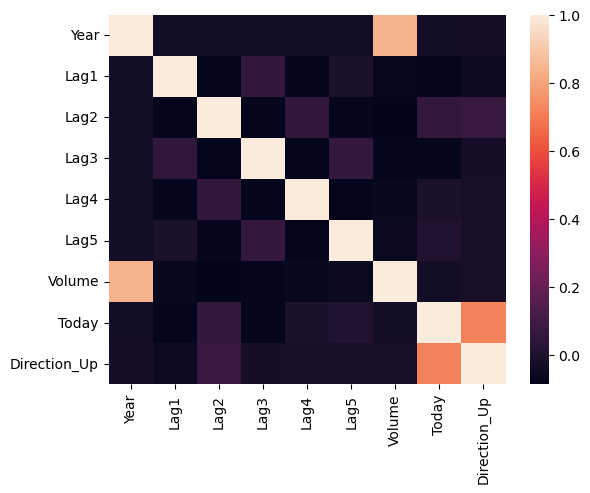

In [15]:
# part a. 
# 

# Load in data 
weekly_df = load_data('Weekly')


# Looking for null values
# 
# weekly_df.info()
#     - none detected

print("Peak into the data...")
print(weekly_df.head(10))

# VISUALIZATIONS
# 
# sns.pairplot(pd.get_dummies(weekly_df).drop('Direction_Down', axis=1))
# 
sns.heatmap(pd.get_dummies(weekly_df).drop('Direction_Down', axis=1).corr())

In [16]:
# part b
# 

# These X and y values will be used throughout this lab
design = MS(weekly_df.columns.drop(['Today', 'Direction', 'Year']))
X = design.fit_transform(weekly_df)
y = weekly_df.Direction == 'Up'

# Creating Model
glm = sm.GLM(y, X, family=sm.families.Binomial()) 
results = glm.fit()

summarize(results)
#    Note the above is the combination of `results.params` & `results.pvalues` 

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [18]:
# part c
# 

# Extracting the prediction probabilities
weekly_pred = results.predict()

# Making an array of "Down" entries and replacing any prediction>0.5 (=threshold) with "Up"
labels = np.array(['Down']*len(weekly_pred)) 
labels[weekly_pred>0.5] = "Up"
 
# Confusion Matrix
#    - NOTE: there re other methods of creating conf.mat; this is the ISLP way
confusion_table(labels, weekly_df.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [28]:
# part d
#   - Log Regression method with high corr predictors
# 

# Using just the predictors with highest correlation to build smaller model
high_corr_df = MS(['Lag2']).fit(weekly_df)

X = high_corr_df.transform(weekly_df)


# Creating boolean vector of logicals corresponding to the observations pre-2005
train = (weekly_df.Year < 2009)

# Splitting Data
X_train, X_test = X.loc[train], X.loc[~train] 
y_train, y_test = y.loc[train], y.loc[~train] 

# # Creating new model with test/train splitting
glm_model = sm.GLM(y_train, 
                   X_train, 
                   family=sm.families.Binomial()) 

# # Trianing model
results_glm = glm_model.fit()

prob_glm = results_glm.predict(exog=X_test)

# Transforming Direction column into arrays of variables split the same way. 
D = weekly_df.Direction
dLabel_train, dLabel_test = D.loc[train], D.loc[~train]

# Making an array of "Down" entries the length of model predictions 
#    and replacing any prediction>0.5 (=threshold) with "Up"
dLabels = np.array(['Down']*len(prob_glm))
dLabels[prob_glm>0.5] = 'Up' 

# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_table(dLabels, dLabel_test))
print("")

# Accuracy and error rate
print(f"Test Accuracy: {round((np.mean(dLabels == dLabel_test))*100)}%")
print(f"Error Rate: {round((np.mean(dLabels != dLabel_test))*100)}%")

Confusion Matrix: 
Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

Test Accuracy: 62%
Error Rate: 38%


In [29]:
# part e
#     - w/ LDA
# 

# Creating model object from LDA method
lda = LDA(store_covariance=True) # `store_convienience` computes covariance matrix when solver='svd'

# NOTE:
#    Here we are removing the `intercept` column since the LDA estimator automatically adds its own intercept
X_train, X_test = X_train.drop("intercept", axis=1), X_test.drop("intercept", axis=1)

# Fitting data onto model
lda.fit(X_train, dLabel_train)

# making predictions
lda_pred = lda.predict(X_test)

# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_table(lda_pred, dLabel_test))
print(" ")

# Accuracy and error rate
print(f"Test Accuracy: {round((np.mean(lda_pred == dLabel_test))*100)}%")
print(f"Error Rate: {round((np.mean(lda_pred != dLabel_test))*100)}%")

Confusion Matrix: 
Truth      Down  Up
Predicted          
Down          9   5
Up           34  56
 
Test Accuracy: 62%
Error Rate: 38%


In [31]:
# part f
#    - w/ QDA
# 

# Creating model
qda = QDA(store_covariance=True) 
qda.fit(X_train, dLabel_train)

# making predictions
qda_pred = qda.predict(X_test)

# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_table(qda_pred, dLabel_test))
print(" ")

# Accuracy and error rate
print(f"Test Accuracy: {round((np.mean(qda_pred == dLabel_test))*100)}%")
print(f"Error Rate: {round((np.mean(qda_pred != dLabel_test))*100)}%")

Confusion Matrix: 
Truth      Down  Up
Predicted          
Down          0   0
Up           43  61
 
Test Accuracy: 59%
Error Rate: 41%


In [32]:
# part g
#     - w/ KNN k=1
# 

# Creating Model
knn1 = KNeighborsClassifier(n_neighbors=1) 

# Training Model
knn1.fit(X_train, dLabel_train)

# Making Predictions
knn1_pred = knn1.predict(X_test) 

# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_table(knn1_pred, dLabel_test))
print(" ")

# Accuracy and error rate
print(f"Test Accuracy: {round((np.mean(knn1_pred == dLabel_test))*100)}%")
print(f"Error Rate: {round((np.mean(knn1_pred != dLabel_test))*100)}%")

Confusion Matrix: 
Truth      Down  Up
Predicted          
Down         21  30
Up           22  31
 
Test Accuracy: 50%
Error Rate: 50%


**Problem 14:**  
Q: In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

**a.)** Create a binary variable, `mpg01`, that contains a $1$ if mpg contains a value above its median, and a $0$ if mpg contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may find it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows: `Auto['mpg01'] = mpg01`

<ins>Answer</ins>: Answer

**b.)** Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<ins>Answer</ins>: Answer

**c.)** Split the data into a training set and a test set.

**d.)** Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in $(b)$. What is the test error of the model obtained?

**e.)** Repeat $(d)$ using QDA.

**f.)** Repeat $(d)$ using logRegression.

**g.)** Repeat $(d)$ using native Bayes.

**h.)** Repeat $(d)$ using KNN. Determine which KNN will be the best for this problem

**i.)** Which is the best performing model for this problem?

<ins>Answer</ins>: Answer

In [ ]:
# part a
# 


In [ ]:
# part b
# 


In [ ]:
# part c
#    - Split the data into a training set and a test set.
# 


In [ ]:
# part d
#    - LDA on the training data in order to predict `mpg01` using the variables that seemed most 
#         associated with `mpg01` in (b).
# 


In [ ]:
# part e
#    - Repeat $(d)$ using QDA.
# 


In [ ]:
# part f
#    - Repeat $(d)$ using logRegression.
# 


In [ ]:
# part g
#    - Repeat $(d)$ using native Bayes.
# 


In [33]:
# part h
#    - Repeat $(d)$ using KNN. Determine best K value
# 
